<h2>8-2 산점도 - 변수 간 관계 표현하기</h2>

<Axes: xlabel='displ', ylabel='hwy'>

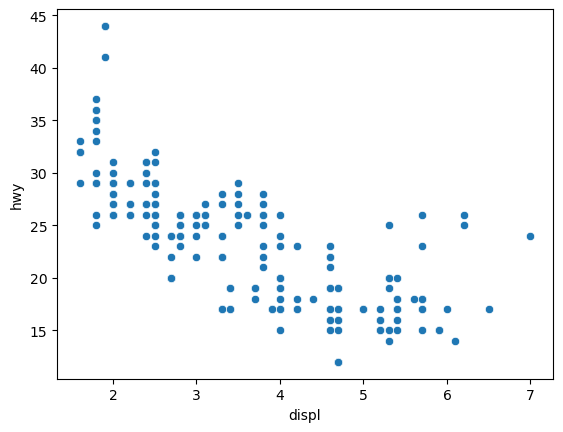

In [1]:
# 그래프를 만들 때 사용할 mpg 데이터 불러오기
import pandas as pd
mpg = pd.read_csv('D:/WE_IT/doit/bookdata/mpg.csv')


# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0), (10.0, 30.0)]

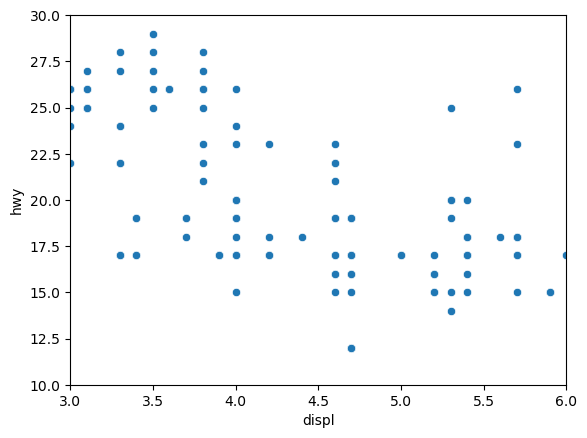

In [2]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = [3, 6], ylim = [10, 30])

<Axes: xlabel='displ', ylabel='hwy'>

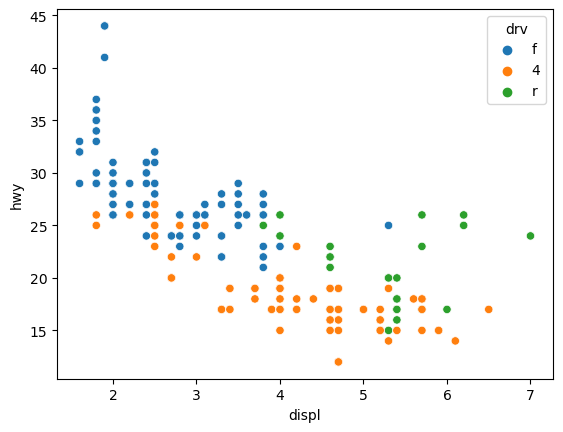

In [4]:
# drv 별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

<h2>8-3 막대 그래프 - 집단 간 차이 표현하기</h2>

**평균** 막대 그래프 만들기
1. 집단별 평균표 만들기

In [6]:
df_mpg = mpg.groupby('drv', as_index = False) \
					  .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


 2. 그래프 만들기

<Axes: xlabel='drv', ylabel='mean_hwy'>

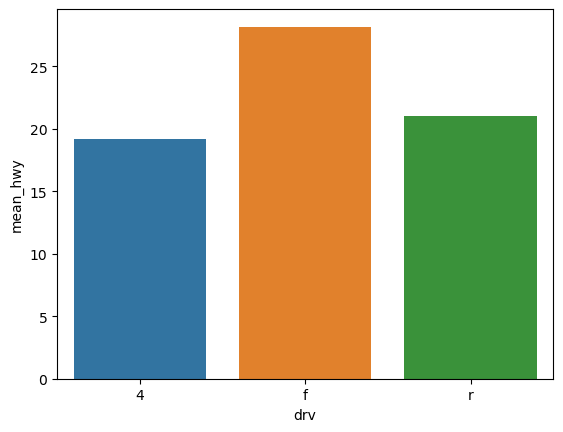

In [7]:
# drv별 hwy 평균을 나타낸 막대 그래프
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

 3. 크기순으로 정렬하기

<Axes: xlabel='drv', ylabel='mean_hwy'>

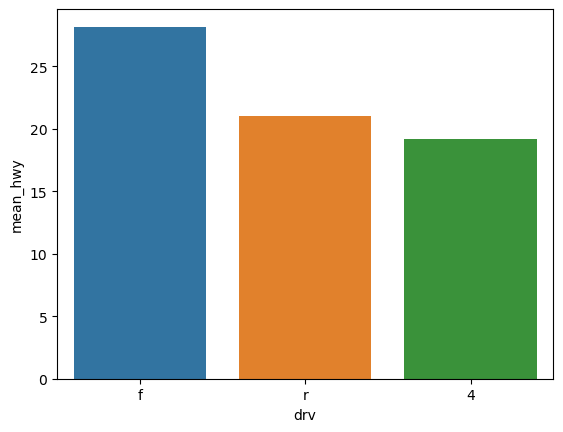

In [8]:
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

**빈도** 막대 그래프 만들기
 1. 집단별 빈도표 만들기

In [9]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False) \
						.agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


2. 그래프 만들기

<Axes: xlabel='drv', ylabel='n'>

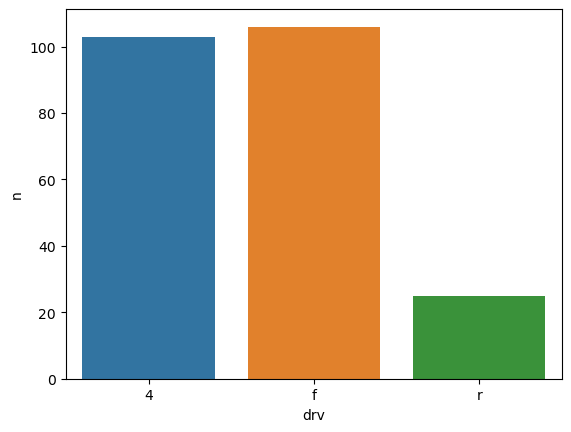

In [10]:
# drv별 빈도를 나타낸 막대 그래프
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

sns.countplot( )으로 빈도 막대 그래프 만들기
 1. sns.countplot( )을 이용하면 집단별 빈도표를 만드는 작업을 생략하고 원자료를 이용해 곧바로 빈도 막대 그래프를 만들 수 있음.

<Axes: xlabel='drv', ylabel='count'>

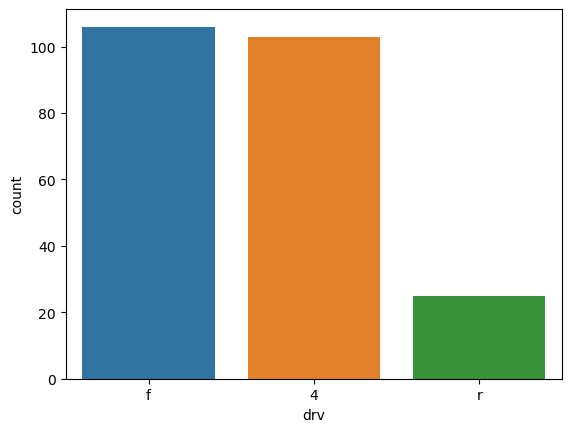

In [11]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

sns.barplot( )으로 출력된 그래프와 x축 순서가 다름.
변수의 고유값을 출력하는 unique( ) 를 이용하면 값의 순서를 알 수 있음.

In [12]:
# sns.barplot()의 drv
# 값의 순서가 알파벳 순으로 되어 있는데 그 이유는 groupby()를 이용해 데이터 프레임을 요약하면 값의 순서가 알파벳순으로 바뀌기 때문.
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

In [13]:
# sns.countplot()의 drv
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

 2. 막대 정렬하기

<Axes: xlabel='drv', ylabel='count'>

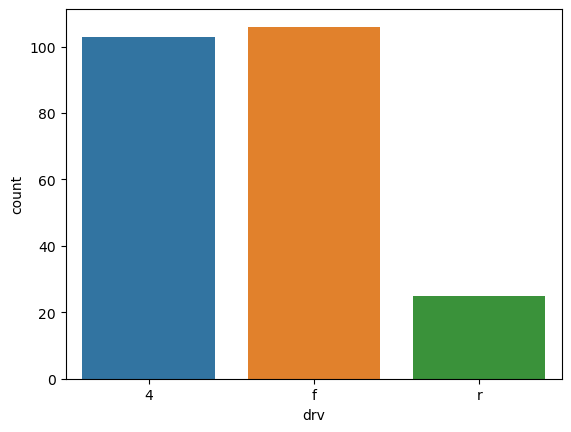

In [14]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [16]:
# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

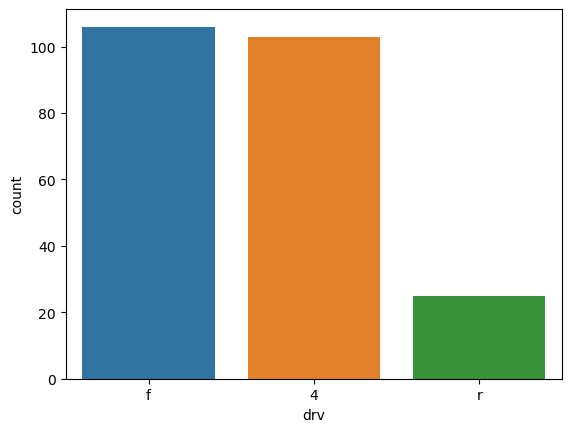

In [17]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', 
							order = mpg['drv'].value_counts().index)

<h2>8-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기</h2>

In [18]:
# economics 데이터 불러오기
economics = pd.read_csv('D:/WE_IT/doit/bookdata/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='unemploy'>

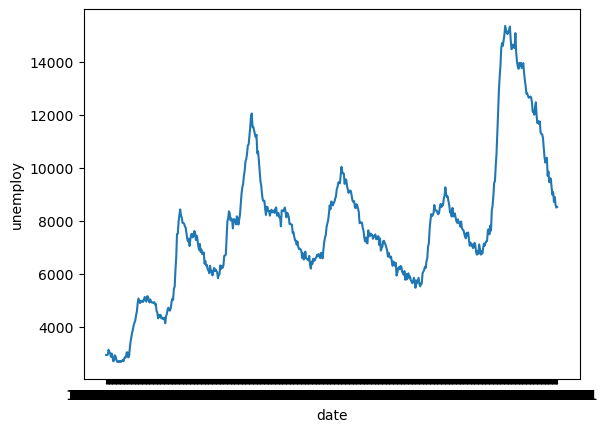

In [19]:
# x축에는 시간을 나타낸 date, y축에는 실업자 수를 나타낸 unemploy를 지정해 선 그래프 만듦
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

위의 코드로 출력된 그래프를 보면 x축에 굵은 선이 표시되어 있는데, date 변수에 담겨있는 ‘연월일’을 나타낸 문자가 여러 번 겹쳐 표시되어서 굵은 선으로 보이는 것.
x축에 연도가 표시되도록 설정하려면 먼저 변수 타입을 object에서 datetime64로 바꿔야 함.

1. 날짜 시간 타입 변수 만들기

In [20]:
# economics에 날짜 시간 타입으로 된 변수 date2를 추가
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [21]:
economics[['date', 'date2']]    # 출력 결과를 보면 두 변수의 값이 같음

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [22]:
# 변수가 날짜 시간 타입으로 되어 있으면 df.dt를 이용해 연,월,일을 추출할 수 있음.

# 연 추출
print(economics['date2'].dt.year)

# 월 추출
print(economics['date2'].dt.month)

# 일 추출
print(economics['date2'].dt.day)

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32
0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32


2. 연도 변수 만들기

In [23]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


3. x축에 연도 표시하기

c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='unemploy'>

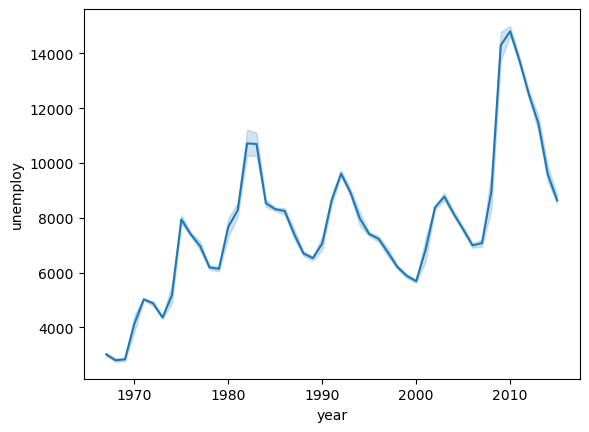

In [24]:
# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

선의 위아래에 표시된 면적은 신뢰구간(confidence interval). 신뢰구간을 표시하지 않으려면 ci = None을 입력하면 됨.

C:\Users\s2102\AppData\Local\Temp\ipykernel_15000\3576668158.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s2102\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='unemploy'>

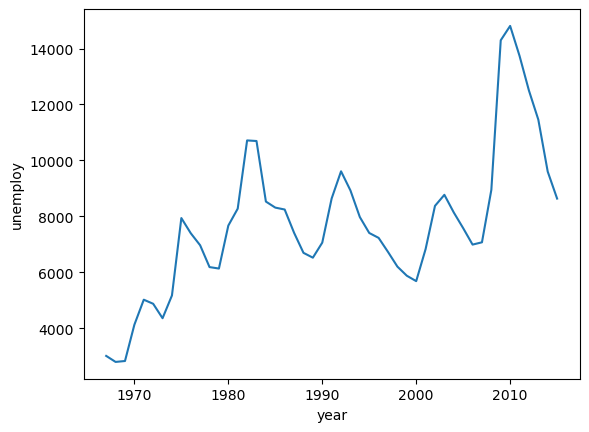

In [25]:
# 신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

<h2>8-5 상자 그림 - 집단 간 분포 차이 표현하기</h2>

<Axes: xlabel='drv', ylabel='hwy'>

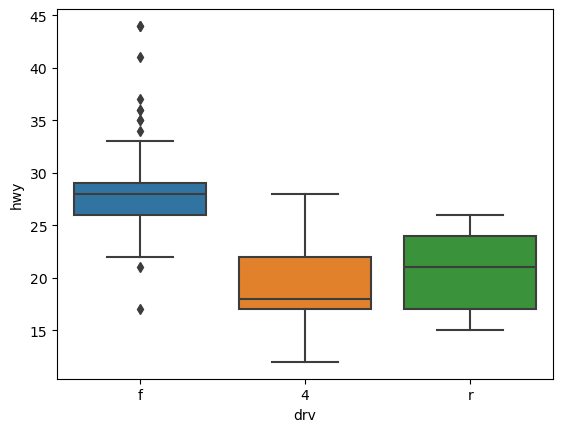

In [26]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')